In [75]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
params = {"ytick.color" : "c",
          "xtick.color" : "c",
          "axes.labelcolor" : "c",
          "axes.edgecolor" : "c",
         "text.color" : "c"}
plt.rcParams.update(params)

import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from collections import Counter
from itertools import cycle
from sklearn import datasets, metrics, tree#silhouette
import scipy.stats as sstats

#from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import graphviz

In [76]:
def KNN(train_X, train_Y, test_X, ks):
    """
    code from ML assignement
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers, no of neighbours
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X#.astype(np.float32)
    test_X = test_X#.astype(np.float32)
    # Alloc space for results
    preds = {}
    #dist matrix
    #X_train - former X, test_x - former Y
    dists = (np.sum(train_X ** 2, axis=1)[:,np.newaxis] - 2 * np.dot(train_X,test_X.T) +
                np.sum(test_X ** 2, axis=1))
    #findes closest trainig points
    #can be better, for small k 'for loop'
    closest = np.argsort(dists, axis=0) #sorting, returns indices
    targets = train_Y[closest]#
    for k in ks:
        predictions = sstats.mode(targets[:k])[0] #take k closest targets
        predictions = predictions.ravel()#flattened array
        preds[k] = predictions
    return preds#returns train examples targets

Zadanie7<br>
Zapoznaj się ze zbiorem danych Human Activity Recognition Using Smartphones
(http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).<br> Spróbuj
stworzyć klasyfikator, który będzie rozpoznawał czynność wykonywaną przez człowieka na
podstawie odczytów sensorów określonych w zestawie danych

In [77]:
#wczytanie danych
X_train = pd.read_csv('data_smartphones/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('data_smartphones/train/y_train.txt', delim_whitespace=True, header=None).values.ravel()

X_test = pd.read_csv('data_smartphones/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('data_smartphones/test/y_test.txt', delim_whitespace=True, header=None).values.ravel()


In [78]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [79]:
ks = np.arange(1,15)
predictions = KNN(np.array(X_train), np.array(y_train), np.array(X_test), ks)


In [80]:
k_max=0.0; k_m=0.0
for k, preds in predictions.items():
    result = list(preds == y_test)#counting True for correct target values
    k_val = result.count(True)/len(result)*100
    if k_val>k_max: 
        k_max = k_val
        k_m = k
    print(f'Poprawnosc dla k = {k}: {k_val}%')
print(f'max poprawnosc dla k = {k_m}: {k_max}')

Poprawnosc dla k = 1: 87.85205293518833%
Poprawnosc dla k = 2: 86.12147947064813%
Poprawnosc dla k = 3: 89.07363420427554%
Poprawnosc dla k = 4: 89.10756701730574%
Poprawnosc dla k = 5: 90.15948422124194%
Poprawnosc dla k = 6: 90.12555140821175%
Poprawnosc dla k = 7: 90.32914828639295%
Poprawnosc dla k = 8: 90.73634204275535%
Poprawnosc dla k = 9: 90.53274516457415%
Poprawnosc dla k = 10: 90.66847641669494%
Poprawnosc dla k = 11: 90.46487953851374%
Poprawnosc dla k = 12: 90.29521547336275%
Poprawnosc dla k = 13: 90.63454360366474%
Poprawnosc dla k = 14: 90.36308109942314%
max poprawnosc dla k = 8: 90.73634204275535


In [81]:
labels = pd.read_csv('data_smartphones/activity_labels.txt', delim_whitespace=True, header=None)
labels = labels.drop([0], axis=1)
labels.columns = ['activity']
print(labels)

             activity
0             WALKING
1    WALKING_UPSTAIRS
2  WALKING_DOWNSTAIRS
3             SITTING
4            STANDING
5              LAYING


In [82]:
metrics.confusion_matrix(predictions[k_m], y_test)

array([[486,  42,  51,   0,   0,   0],
       [  1, 426,  42,   4,   0,   0],
       [  9,   3, 327,   0,   0,   0],
       [  0,   0,   0, 420,  51,   2],
       [  0,   0,   0,  67, 481,   1],
       [  0,   0,   0,   0,   0, 534]])

In [83]:
random_forest = RandomForestClassifier(n_estimators=20)
extra_random_forest = ExtraTreesClassifier(n_estimators=20)

random_forest.fit(X_train, y_train)
extra_random_forest.fit(X_train, y_train);

In [84]:
print('Random Forest:')
print(metrics.confusion_matrix(random_forest.predict(X_test), y_test))
print(f'Score: {random_forest.score(X_test, y_test) * 100:.2f}%\n')


Random Forest:
[[482  41  20   0   0   0]
 [  7 423  47   0   0   0]
 [  7   7 353   0   0   0]
 [  0   0   0 439  47   0]
 [  0   0   0  52 485   0]
 [  0   0   0   0   0 537]]
Score: 92.26%



In [85]:
print('Extremely Randomized Trees:')
print(metrics.confusion_matrix(extra_random_forest.predict(X_test), y_test))
print(f'Score: {extra_random_forest.score(X_test, y_test) * 100:.2f}%\n')

Extremely Randomized Trees:
[[475  38  23   0   0   0]
 [ 12 423  45   0   0   0]
 [  9  10 352   0   0   0]
 [  0   0   0 437  20   0]
 [  0   0   0  54 512   0]
 [  0   0   0   0   0 537]]
Score: 92.84%



Zadanie 4. (2 punkty)<br>
Zbiór danych Mushroom (http://archive.ics.uci.edu/ml/datasets/Mushroom) zawiera informacje o
grzybach i o tym czy są one jadalne, trujące, nie polecane do jedzenia lub nieznane. Zapoznaj się
z tym zbiorem danych i stwórz drzewo decyzyjne określające jadalność grzybów na podstawie ich
cech określonych w zestawie danych.

In [133]:
from sklearn.tree import DecisionTreeClassifier
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'


In [139]:
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat" ]
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom_df = pd.read_csv(url, header=None, names=columns)
#mushroom_idx_df = mushroom_df.reset_index()
mushroom_df.dropna(axis='columns')

for i in mushroom_df.columns:
    mushroom_df[i] = pd.Categorical(mushroom_df[i]).codes
mushroom_df.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [151]:
X_mushroom_train, X_mushroom_test = train_test_split(mushroom_df, test_size=0.3333)
Y_mushroom_train, Y_mushroom_test = X_mushroom_train['target'], X_mushroom_test['target']
X_mushroom_test = X_mushroom_test.drop('target', axis = 1)
X_mushroom_train = X_mushroom_train.drop('target', axis = 1)

#y_mushroom = X_mushroom['target']
#X_mushroom = X_mushroom.drop('target',axis=1)
#X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(X_mushroom, y_mushroom, test_size=0.3)


In [160]:
mushroom_tree_gini = tree.DecisionTreeClassifier(criterion='gini')
mushroom_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy')
mushroom_tree_gini = mushroom_tree_gini.fit(X_mushroom_train, Y_mushroom_train)
mushroom_tree_entropy = mushroom_tree_entropy.fit(X_mushroom_train, Y_mushroom_train)

In [156]:
predicts_gini = mushroom_tree_gini.predict(X_mushroom_test)
predicts_entropy = mushroom_tree_entropy.predict(X_mushroom_test)

print('Confusion matrix for gini')
print(metrics.confusion_matrix(predicts_gini, Y_mushroom_test))

print('Confusion matrix for entropy')
print(metrics.confusion_matrix(predicts_entropy, Y_mushroom_test))

Confusion matrix for gini
[[1394    0]
 [   0 1314]]
Confusion matrix for entropy
[[1394    0]
 [   0 1314]]


In [157]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

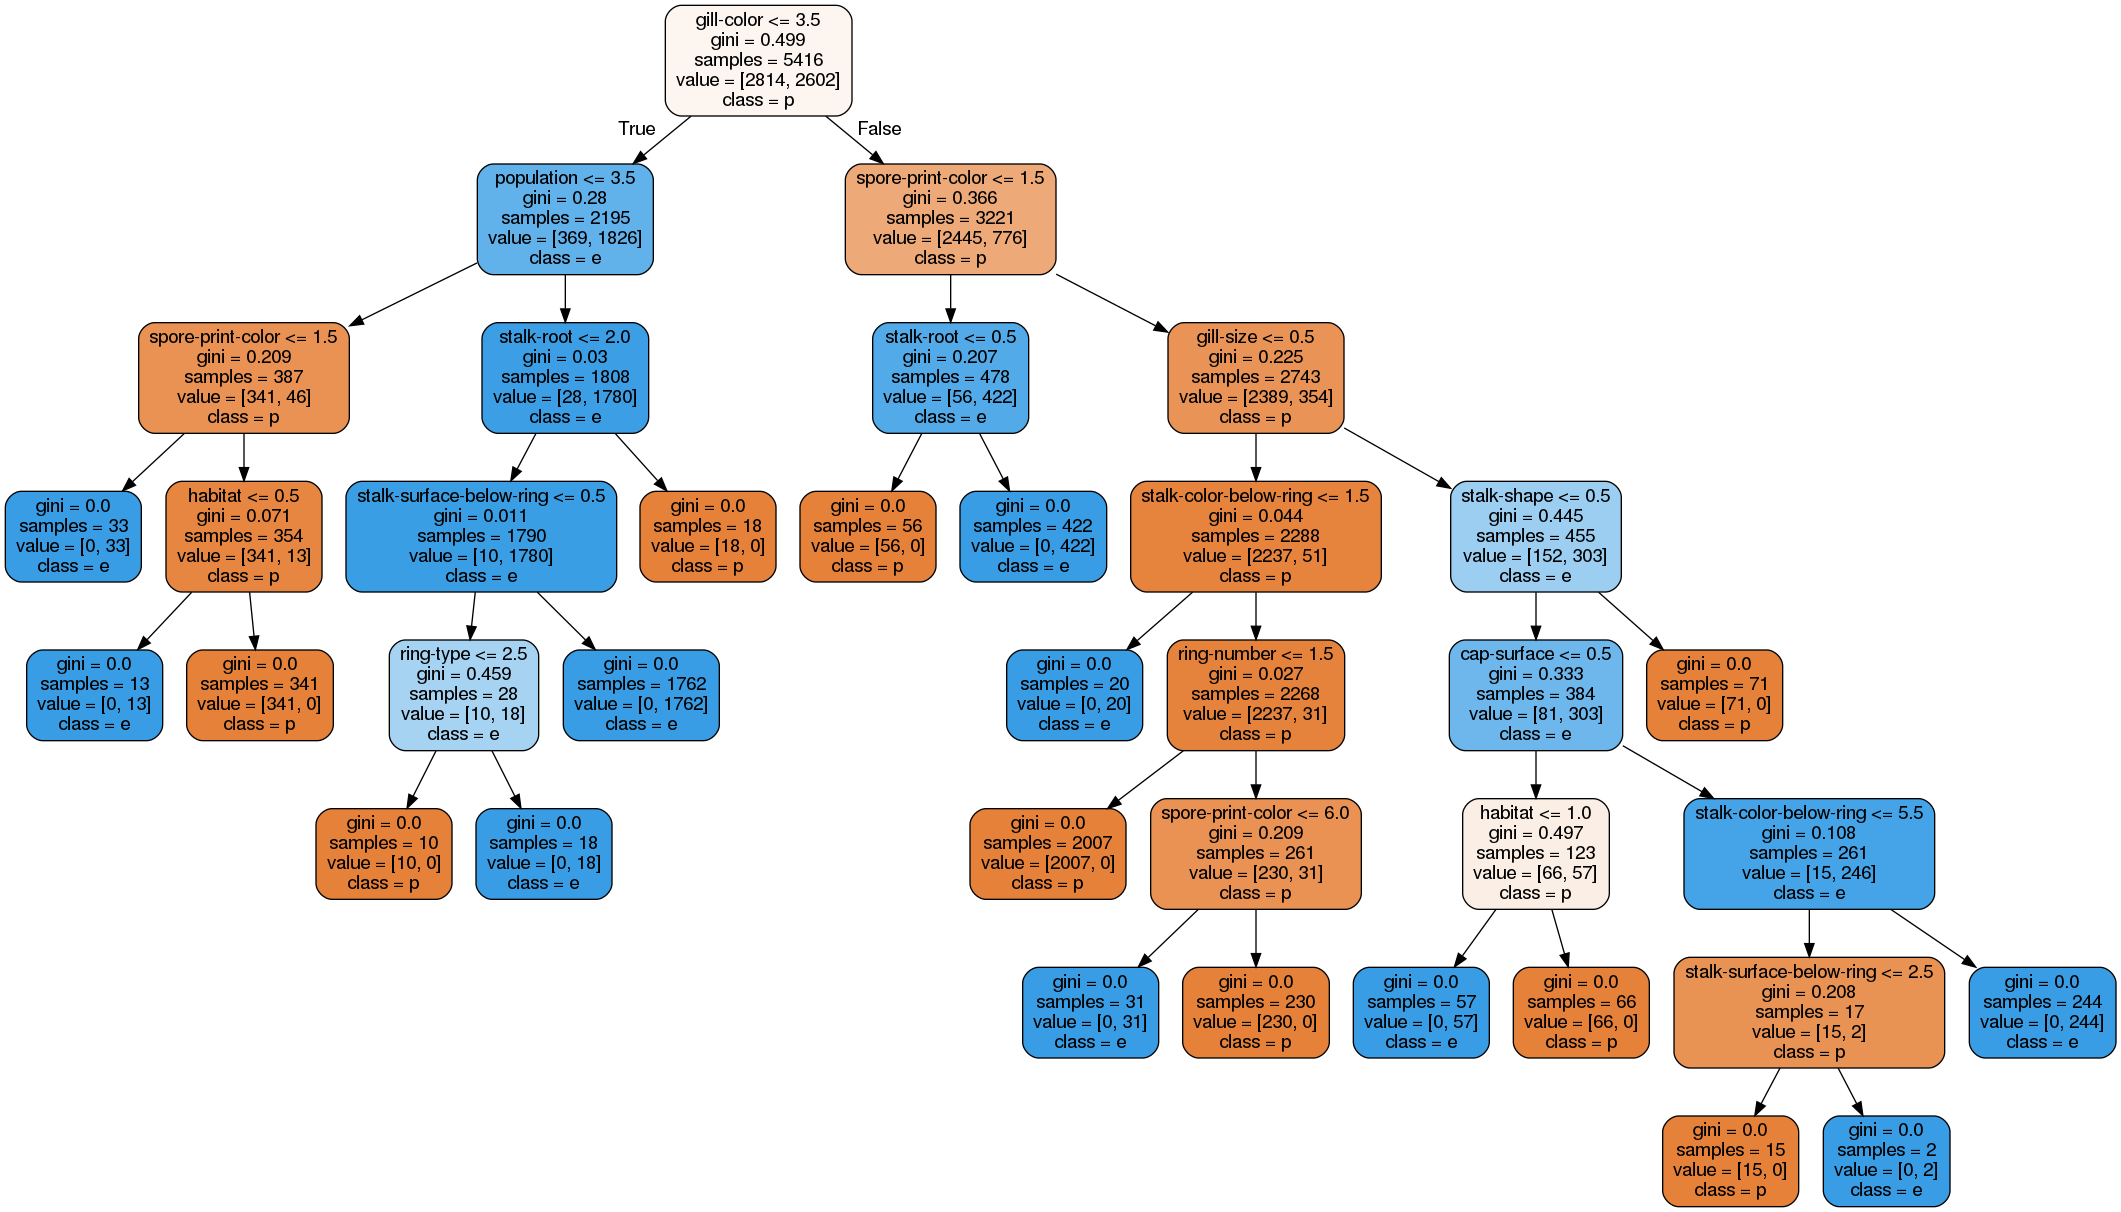

In [164]:
#with open("/home/oskar/Documents/sem3/ed/mushroom.dot", "w") as f:
 #   tree.export_graphviz(dtree, out_file=f, feature_names=columns)
mushroom_features = mushroom_df.columns[1:]
dot_data = tree.export_graphviz(mushroom_tree_gini, out_file=None,
                                class_names=['p','e'],
                                feature_names=mushroom_features,
                                filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

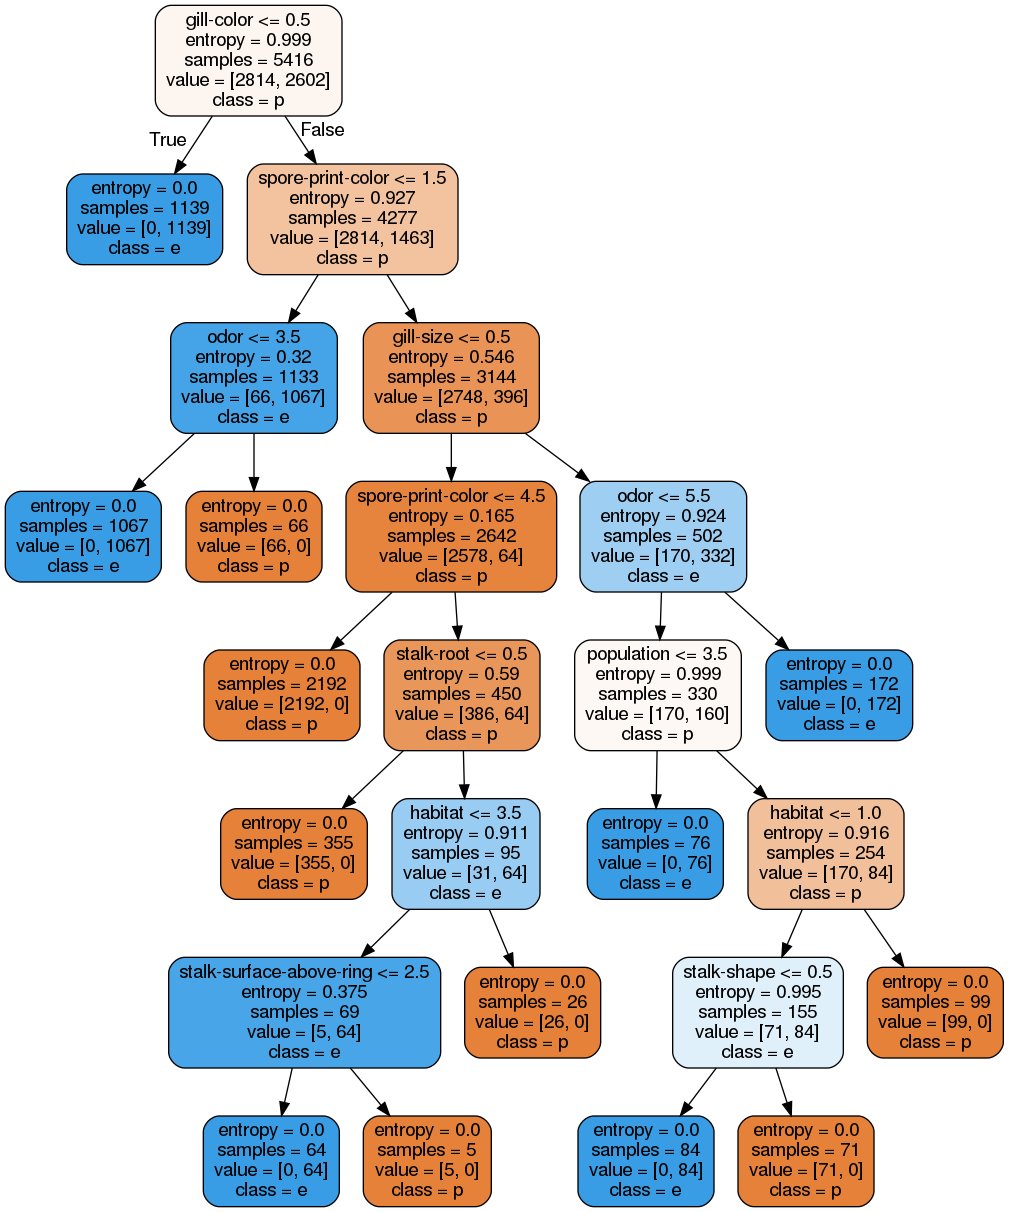

In [165]:
dot_data = tree.export_graphviz(mushroom_tree_entropy, out_file=None,
                                class_names=['p','e'],
                                feature_names=mushroom_features,
                                filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Zadanie 5. (2 punkty)<br>
Zbiór danych Car Evaluation (http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) zawiera
informacje o samochodach i rekomendacje dotyczącą ich ewentualnego kupna. Zapoznaj się z tym
zbiorem danych i stwórz dla niego drzewo decyzyjne.

In [205]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]
cars_df = pd.read_csv('car.data', header=None, names=columns)

for i in cars_df.columns:
    cars_df[i] = pd.Categorical(cars_df[i]).codes
X_cars_train, X_cars_test = train_test_split(cars_df, test_size=0.3333)
Y_cars_train, Y_cars_test = X_cars_train['target'], X_cars_test['target']
X_cars_test = X_cars_test.drop('target', axis=1)
X_cars_train = X_cars_train.drop('target', axis=1)


In [206]:
print(cars_df_target)
print(cars_df["target"])
cars_df.head()

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
5       unacc
6       unacc
7       unacc
8       unacc
9       unacc
10      unacc
11      unacc
12      unacc
13      unacc
14      unacc
15      unacc
16      unacc
17      unacc
18      unacc
19      unacc
20      unacc
21      unacc
22      unacc
23      unacc
24      unacc
25      unacc
26      unacc
27      unacc
28      unacc
29      unacc
        ...  
1698    unacc
1699     good
1700    vgood
1701    unacc
1702    unacc
1703    unacc
1704    unacc
1705    unacc
1706    unacc
1707    unacc
1708    unacc
1709    unacc
1710    unacc
1711      acc
1712     good
1713    unacc
1714     good
1715    vgood
1716    unacc
1717     good
1718    vgood
1719    unacc
1720      acc
1721     good
1722    unacc
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: target, Length: 1728, dtype: object
0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10  

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [207]:
#X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.3)


In [208]:
cars_tree_gini = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=7, max_depth=10)
cars_tree_gini = cars_tree_gini.fit(X_cars_train, Y_cars_train)
cars_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7, max_depth=10)
cars_tree_entropy = cars_tree_entropy.fit(X_cars_train, Y_cars_train)


In [209]:
with open("/home/oskar/Documents/sem3/ed/cars.dot", "w") as f:
    tree.export_graphviz(cars_tree_gini, out_file=f,
                         feature_names=cars_df.columns[1:],
                                class_names=['acc','good','unacc','vgood'],
                                filled=True, rounded=True)  

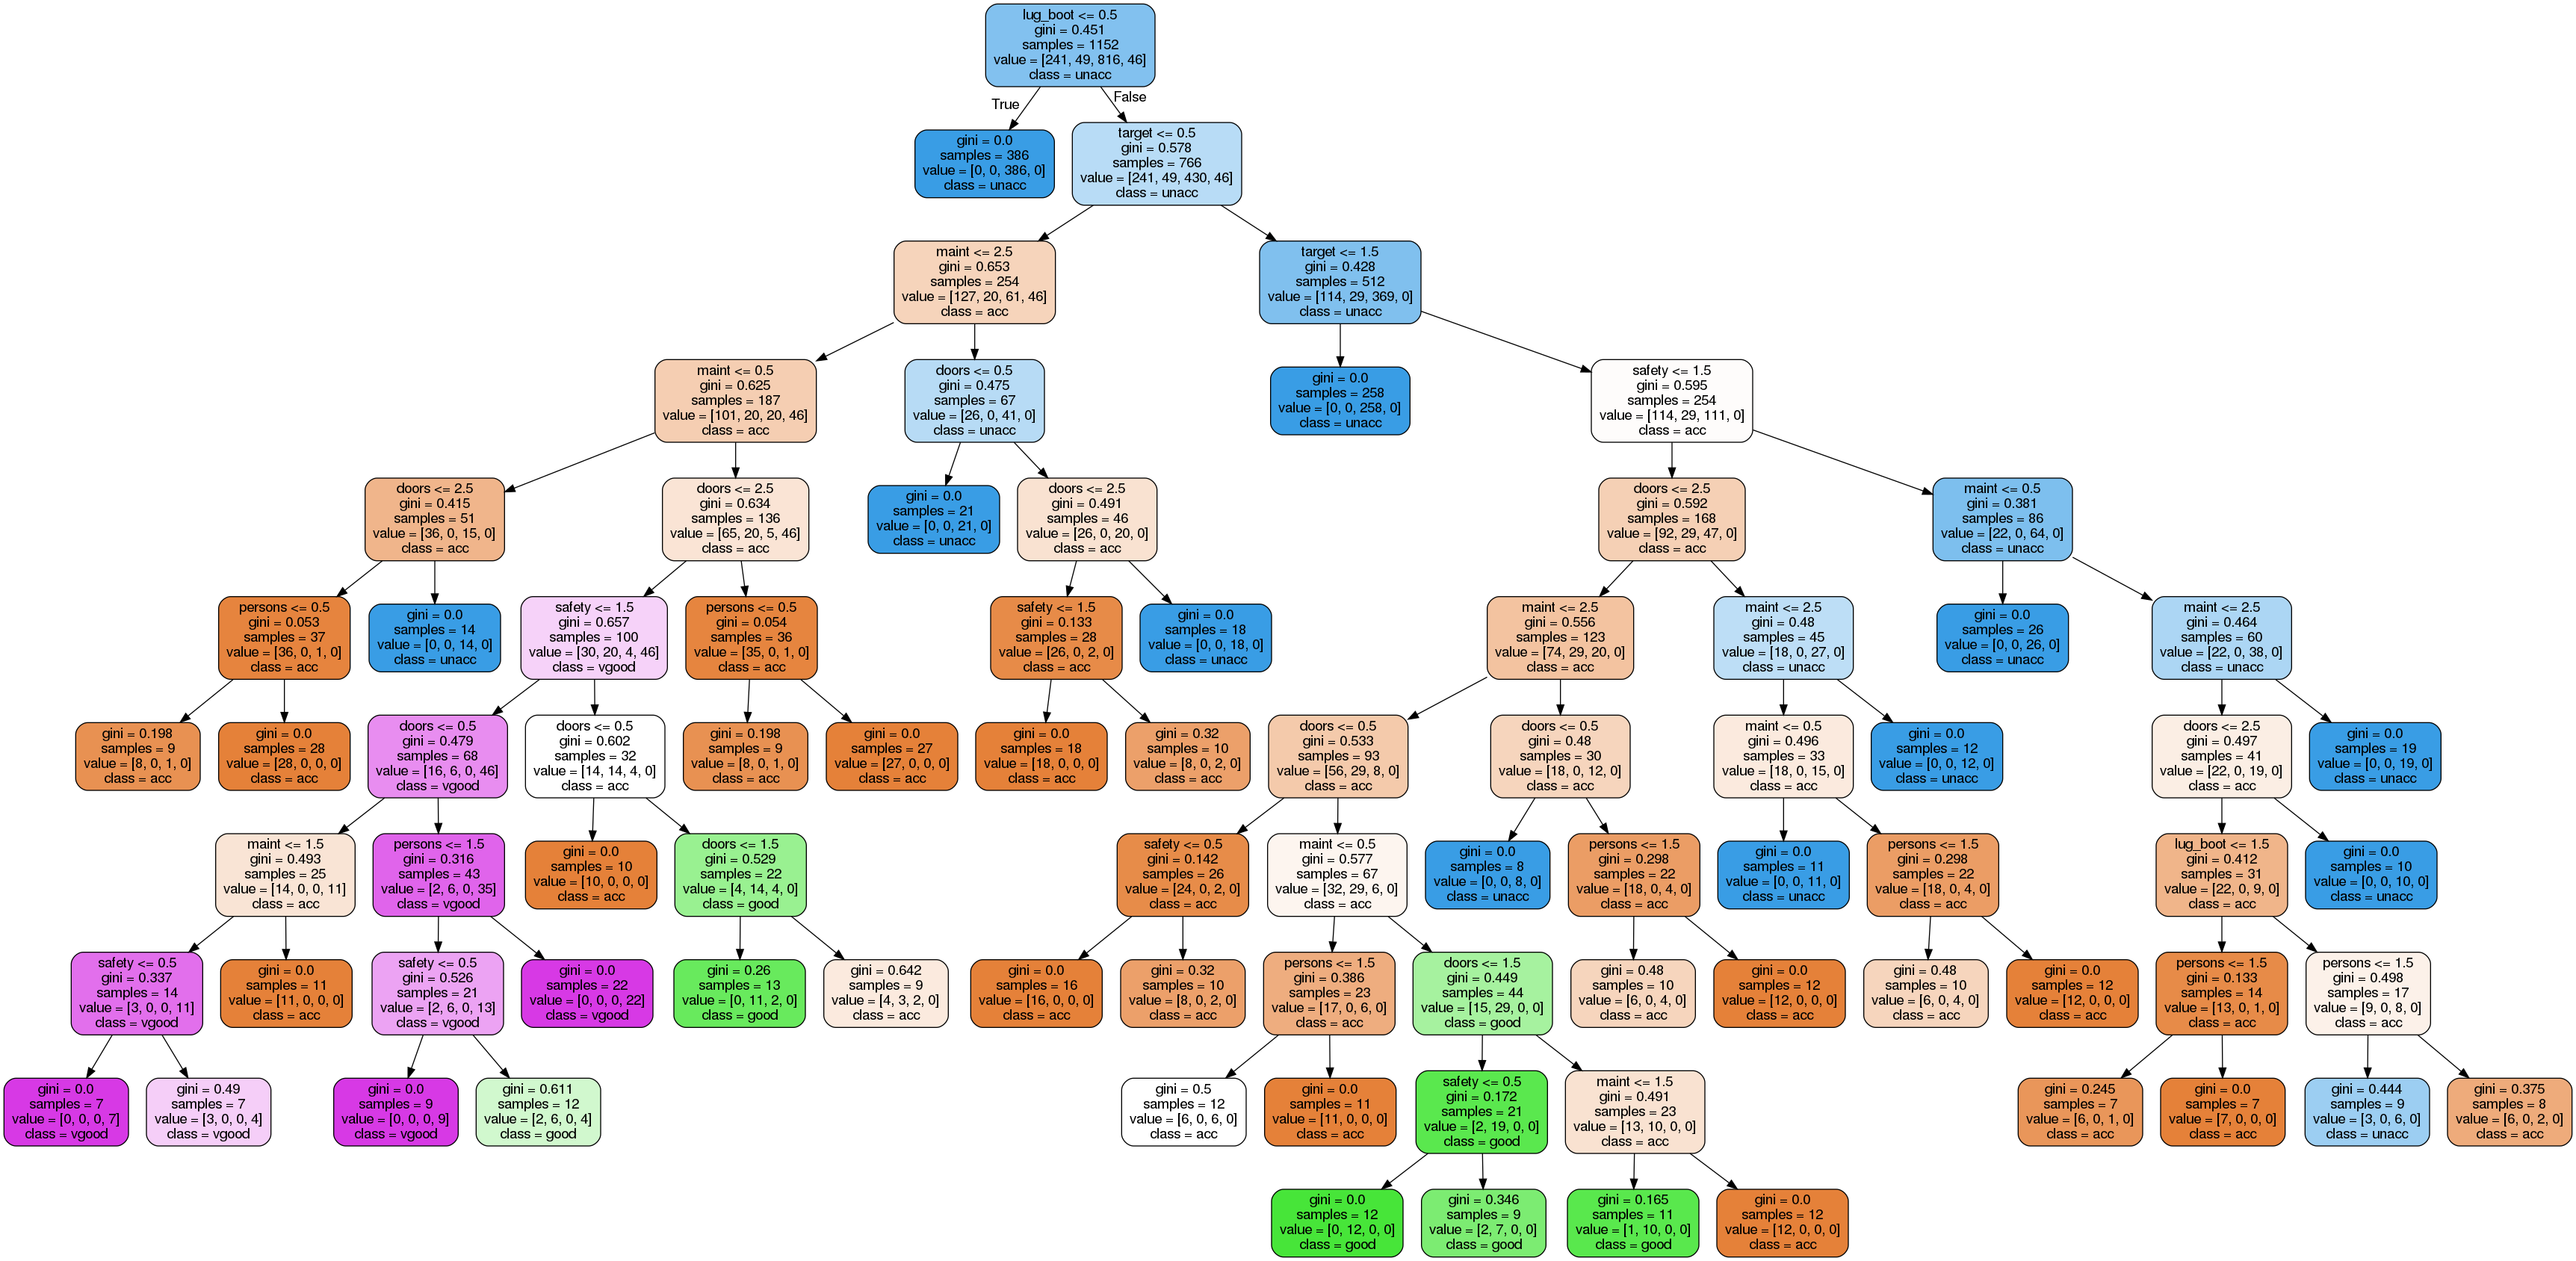

In [210]:
dot_data = tree.export_graphviz(cars_tree_gini, out_file=None,
                                feature_names=cars_df.columns[1:],
                                class_names=['acc','good','unacc','vgood'],
                                filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


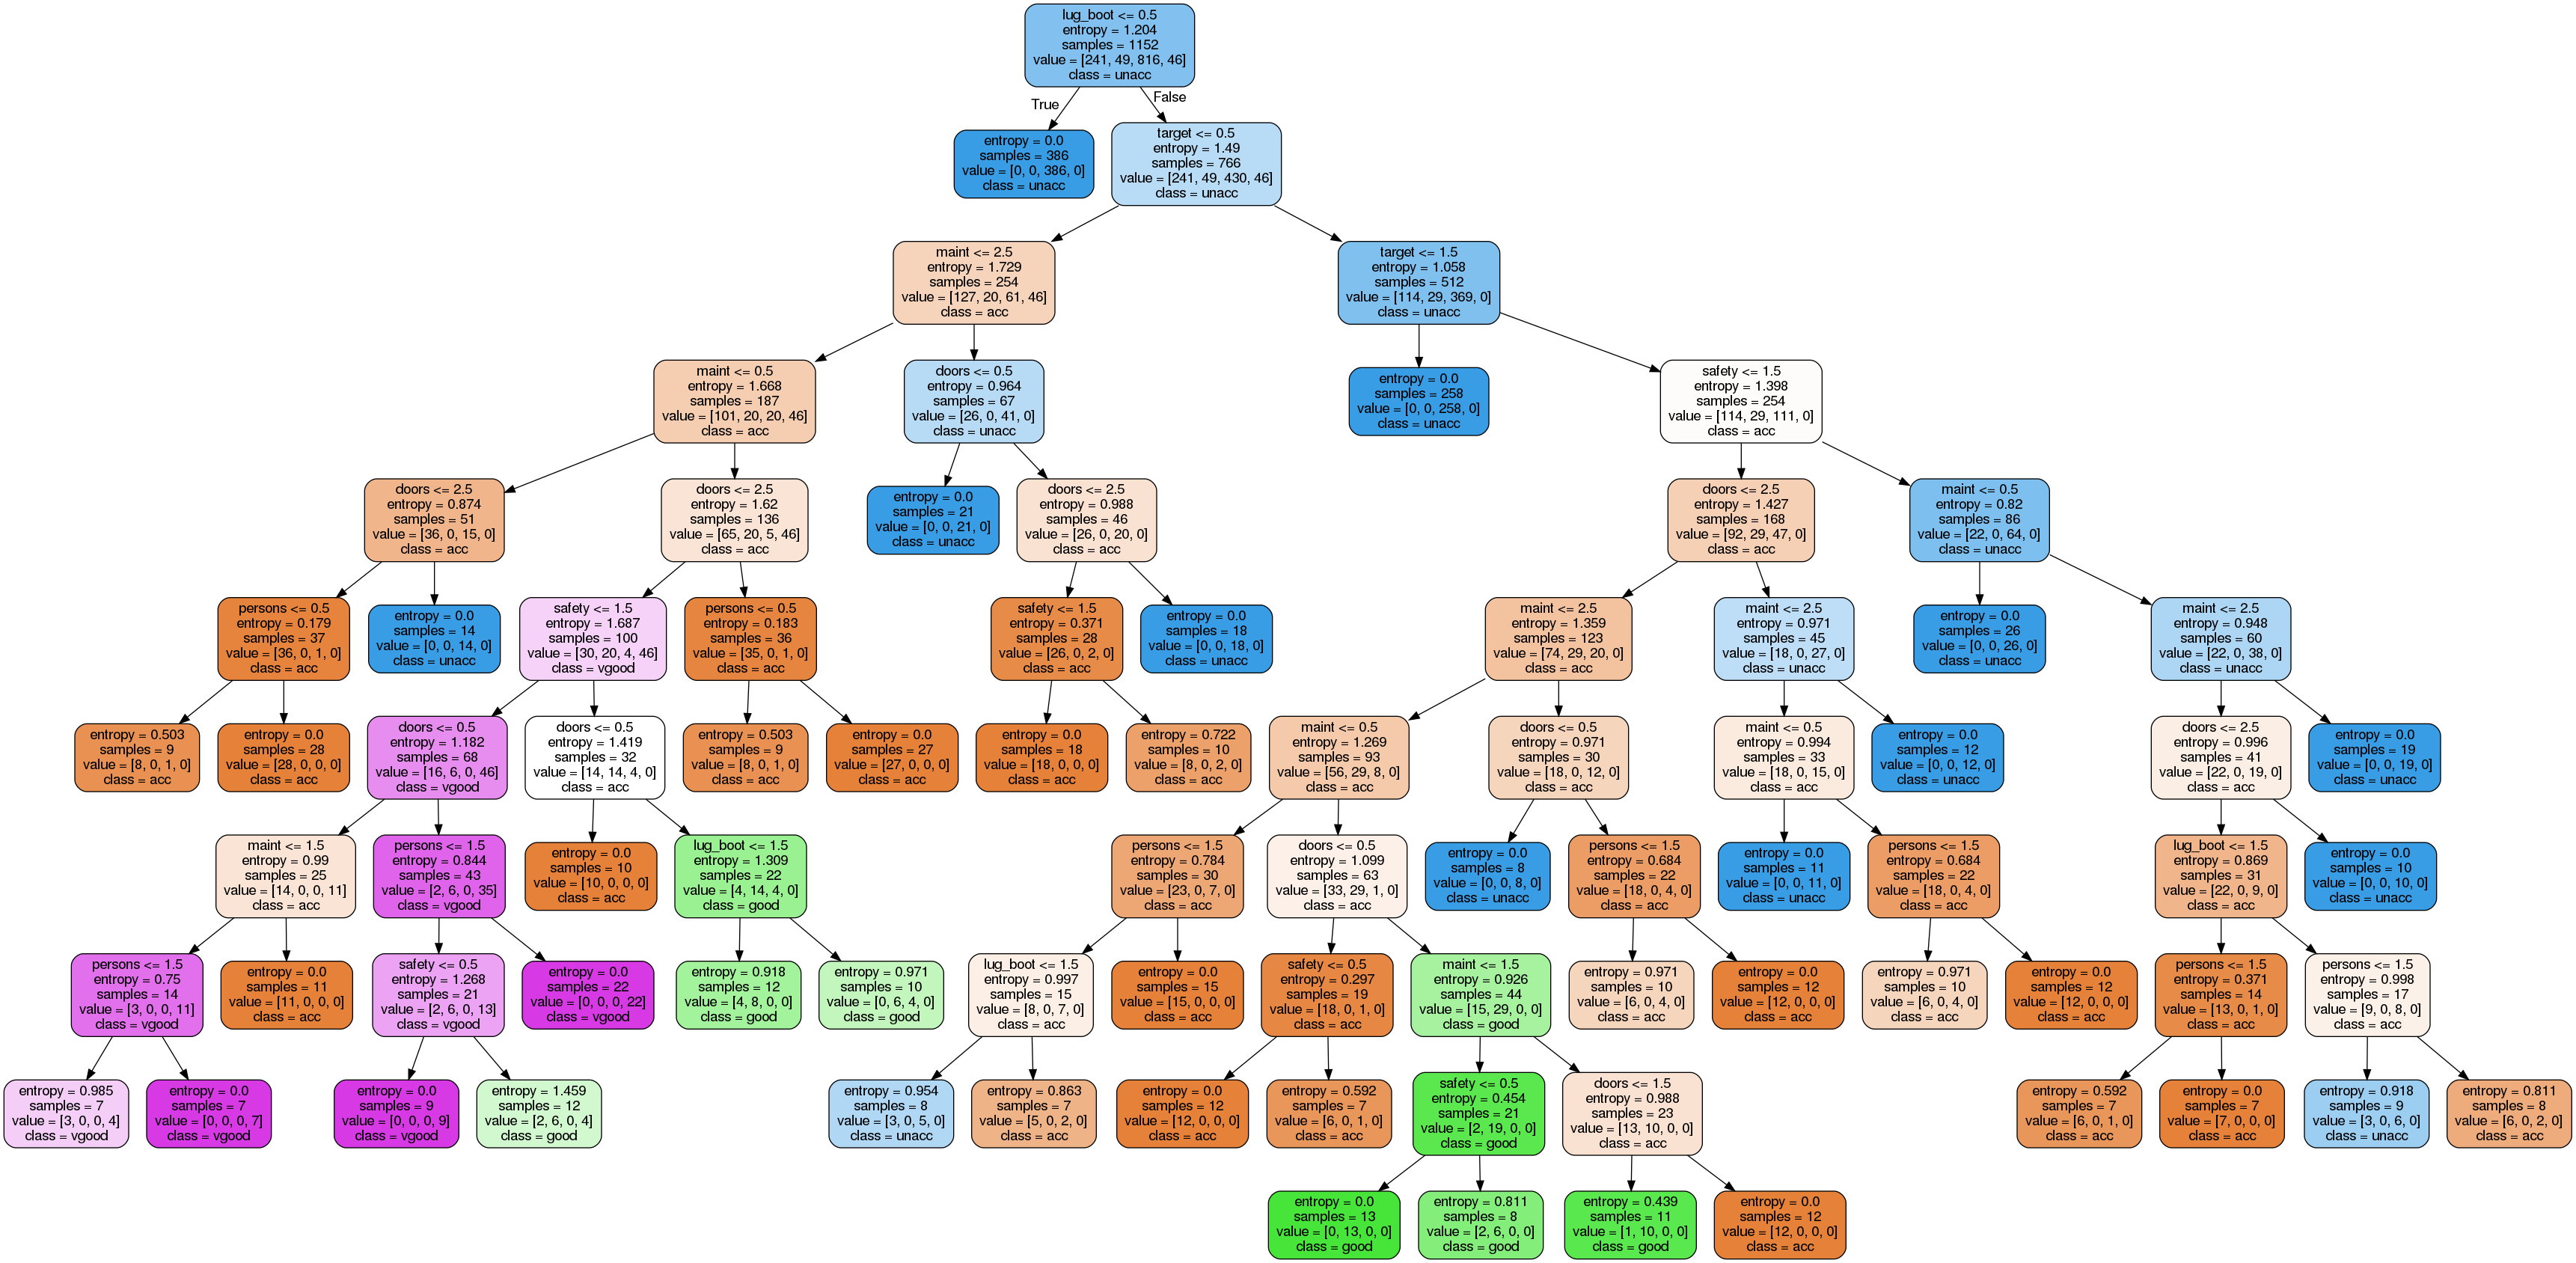

In [211]:
dot_data = tree.export_graphviz(cars_tree_entropy, out_file=None,
                                feature_names=cars_df.columns[1:],
                                class_names=['acc','good','unacc','vgood'],
                                filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [212]:
predicts_gini = cars_tree_gini.predict(X_cars_test)
predicts_entropy = cars_tree_entropy.predict(X_cars_test)

print('Confusion matrix for gini')
print(metrics.confusion_matrix(predicts_gini, Y_cars_test))

print('Confusion matrix for entropy')
print(metrics.confusion_matrix(predicts_entropy, Y_cars_test))

Confusion matrix for gini
[[134   4  16   0]
 [  7  16   0   0]
 [  2   0 378   0]
 [  0   0   0  19]]
Confusion matrix for entropy
[[128   0  15   0]
 [ 10  20   0   0]
 [  5   0 379   0]
 [  0   0   0  19]]


In [213]:
print(metrics.f1_score(predicts_gini, np.array(Y_cars_test), average=None))
print(cars_tree_gini.score(X_cars_test, Y_cars_test))
print(metrics.f1_score(predicts_entropy, np.array(Y_cars_test), average=None))
print(cars_tree_entropy.score(X_cars_test, Y_cars_test))

[0.9023569  0.74418605 0.97674419 1.        ]
0.9496527777777778
[0.8951049  0.8        0.97429306 1.        ]
0.9479166666666666
